In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from statistics import median
from statistics import mean
import cv2
from numpy import bitwise_xor
from statistics import mode
from scipy import stats as s

In [2]:
loc = []
loc = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P5/II/trump_plays.jpg'
img = np.array(Image.open(loc))


# Graysclae conversion:

In [3]:
gray_img = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114

(-0.5, 983.5, 637.5, -0.5)

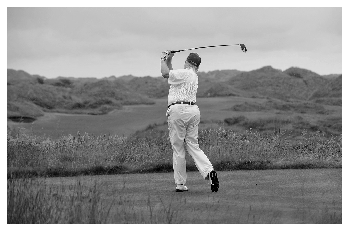

In [9]:
plt.imshow(gray_img,'gray')
plt.axis('off')
plt.show()

In [258]:
def filter(image,filter_size):
    filtered_image = np.zeros(list(image.shape))
    x,y = image.shape
    for i in range(x):
        for j in range(y):
            filtered_image[i,j] = pix_med_filter([i,j], image, filter_size)
    fil_size = filter_size
    return filtered_image

def pix_med_filter(pixelcoor, image2, filtershape):
    size = list(range(-filtershape//2+1,filtershape//2+1))
    a, b = pixelcoor
    z, w = image2.shape
    neigh_pixs = []
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                neigh_pixs.append(image2[a+row,b+col])
    out_pixel = mean(neigh_pixs)
    return out_pixel

In [302]:
cov = filter(gray_img,5)
cov = np.array(cov,dtype = int)

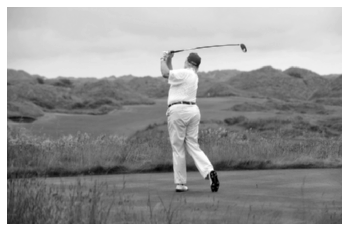

In [303]:
plt.imshow(cov,'gray')
plt.axis('off')
plt.show()

In [261]:
def freq_pix(image,filter_size):
    filtered_image = np.zeros(list(image.shape))
    x,y = image.shape
    for i in range(x):
        for j in range(y):
            filtered_image[i,j] = most_freq([i,j], image, filter_size)
    fil_size = filter_size
    return filtered_image
def most_freq(pixelcoor, image2, filtershape):
    size = list(range(-filtershape//2+1,filtershape//2+1))
    a, b = pixelcoor
    z, w = image2.shape
    neigh_pixs = []
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                neigh_pixs.append(image2[a+row,b+col])
    out_pixel = int(s.mode(neigh_pixs)[0])
    return out_pixel

In [304]:
fr = freq_pix(cov,3)

In [305]:
fr = np.array(fr, dtype = int)

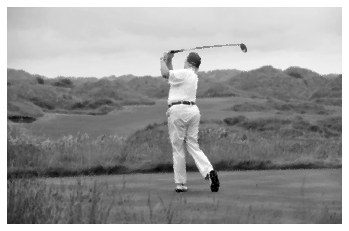

In [306]:
plt.imshow(fr,'gray')
plt.axis('off')
plt.show()

In [310]:
def similar_coors(image):
    x,y = image.shape
    sim_coors = [0]*256
    for i in range(x):
        for j in range(y):
            index = image[i,j]
            if sim_coors[index] == 0:
                sim_coors[index] = []
            sim_coors[index].append([i,j])
    return sim_coors

In [329]:
sc_fr = similar_coors(fr)

In [330]:
copy = img.copy()

In [331]:
av_vals = []
for i in sc_fr:
    if i != 0:
        av_vals = []
        for coor in i:
            a,b = coor
            av_vals.append(img[a,b])
        average = np.mean(av_vals,axis = 0)
        for coor in i:
            a,b = coor
            copy[a,b] = average

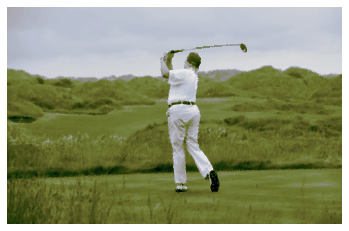

In [332]:
plt.imshow(copy)
plt.axis('off')
plt.show()

In [318]:
def filter(image,filter_size):
    filtered_image = np.zeros(list(image.shape))
    x,y = image.shape
    for i in range(x):
        for j in range(y):
            filtered_image[i,j] = pix_med_filter([i,j], image, filter_size)
    fil_size = filter_size
    return filtered_image

def pix_med_filter(pixelcoor, image2, filtershape):
    size = list(range(-filtershape//2+1,filtershape//2+1))
    a, b = pixelcoor
    z, w = image2.shape
    neigh_pixs = []
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                neigh_pixs.append(image2[a+row,b+col])
    out_pixel = median(neigh_pixs)
    return out_pixel

In [322]:
un1 = filter(copy[:,:,0],5)
un2 = filter(copy[:,:,1],5)
un3 = filter(copy[:,:,2],5)

In [323]:
copy_rgb = np.dstack((un1,un2,un3))
copy_rgb = np.array(copy_rgb,dtype = int)

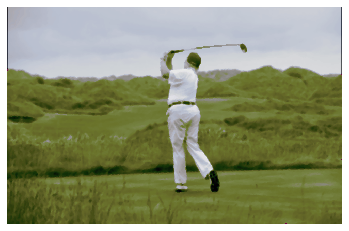

In [324]:
plt.imshow(copy_rgb)
plt.axis('off')
plt.show()